In [13]:
import requests
import json

In [44]:
mydict={
  'api-key': '82c8d72e-34be-52fd-a251-4238aa29d924',
  'product': 'pm25',
  'region': 'kozhikode',
  'regionType': 'district',
  'duration': '1d'
}

In [15]:
request=requests.get("https://gateway.blueskyhq.in/api/breezo/spatial", params = mydict).json()
print(json.dumps(request, indent=2))

{
  "data": [
    {
      "datetime": "2022-09-14T00:00:00.000Z",
      "pm25": null
    }
  ],
  "meta": {
    "duration": "1d",
    "region": "kozhikode",
    "regionType": "district"
  }
}


In [47]:
mydict={
  'api-key': '74b93f11-ec8c-5ed3-8a91-b936ecb2b385',
  'product': 'pm25',
  'region': 'kozhikode',
  'regionType': 'district',
  'duration': '1w'
}

kozhikode_request1m=requests.get("https://gateway.blueskyhq.in/api/breezo/spatial",params=mydict).json()
print(json.dumps(kozhikode_request1w, indent=2))

{
  "data": [
    {
      "datetime": "2022-09-08T00:00:00.000Z",
      "pm25": 16.25478390102828
    },
    {
      "datetime": "2022-09-09T00:00:00.000Z",
      "pm25": 18.581838447943444
    },
    {
      "datetime": "2022-09-10T00:00:00.000Z",
      "pm25": null
    },
    {
      "datetime": "2022-09-11T00:00:00.000Z",
      "pm25": 20.964436053984574
    },
    {
      "datetime": "2022-09-12T00:00:00.000Z",
      "pm25": null
    },
    {
      "datetime": "2022-09-13T00:00:00.000Z",
      "pm25": null
    },
    {
      "datetime": "2022-09-14T00:00:00.000Z",
      "pm25": null
    }
  ],
  "meta": {
    "duration": "1w",
    "region": "kozhikode",
    "regionType": "district"
  }
}


In [18]:
import pandas as pd

In [42]:
df= pd.DataFrame(kozhikode_request1w['data'])
df['datetime'] = pd.to_datetime(df['datetime']).dt.date
df = df.interpolate()
df

,datetime,pm25
0,2022-09-08,16.254784
1,2022-09-09,18.581838
2,2022-09-10,19.773137
3,2022-09-11,20.964436
4,2022-09-12,20.964436
5,2022-09-13,20.964436
6,2022-09-14,20.964436


In [27]:
df.loc[df['pm25'].idxmax()]

datetime    2022-09-11T00:00:00.000Z
pm25                       20.964436
Name: 3, dtype: object

In [28]:
df.loc[df['pm25'].idxmin()]

datetime    2022-09-08T00:00:00.000Z
pm25                       16.254784
Name: 0, dtype: object

In [29]:
df['pm25'].mean()

19.78107197369629

Text(0.5, 1.0, 'Polluton in Kozhikode City')

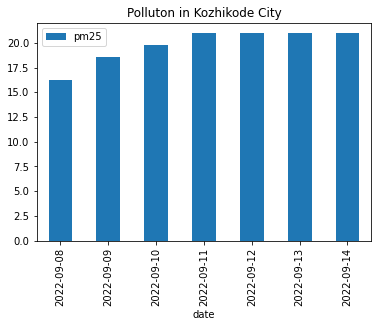

In [43]:
import matplotlib.pyplot as plt 

df.plot(x="datetime", y="pm25", kind="bar")
plt.xlabel('date')
plt.title('Polluton in Kozhikode City')
